In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import pulser
from pulser.devices import DigitalAnalogDevice, MockDevice
from pulser.register import Register

import sys
sys.path.append('../')

from source.qubo import anneal, plot_distribution, draw_solutions

The question is: If this is the Hamiltonian
$H(t) = \sum_i \frac{\hbar}{2} \Omega_i(t) \sigma_i^x - \sum_i \delta_i(t) \hbar \hat{n}_i + \sum_{j<i} \frac{C_6}{R_{ij}^6} \hat{n}_i \hat{n}_j$

and the first two terms come from the laser pulse, then how is the ground state not $|0\cdots 0\rangle$?
Once the laser is gone, there is only the last term left which has all positive coefficients, so $n_i=0\forall i$ would be the minimum engery.
First I thought it had to do with $\delta$, but that's only half the story.
- $\Omega(t)=0 \to \Omega_\text{max} \to 0$: In the end the transitions freeze out and not quantum dynamics happens any more
- $\delta(t)=\delta_\text{init} < 0 \to 0 \to \delta_\text{final} > 0$

Let's first draw some nice plots for a quantum wire of length 4:

Note: One more point: In those quantum wires, actually the detuning on the inner atoms (all except the two outer most ones) should be double what the outer atoms have.

# Link of 2

Now let's simplify the problem and only go to length 2, i.e. two atoms in each others Rydberg radius.
Note that here the half radius is drawn, so as soon as the two balls touch, they are within each others Rydberg radius.

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


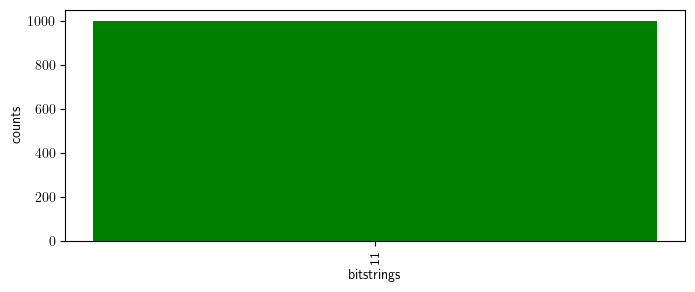

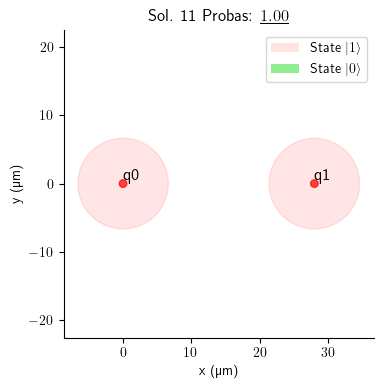

In [2]:
dx = 28
coords = [
    [-0, 0], 
    [dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -0
delta_f = 0
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=1, draw_graph=True)

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


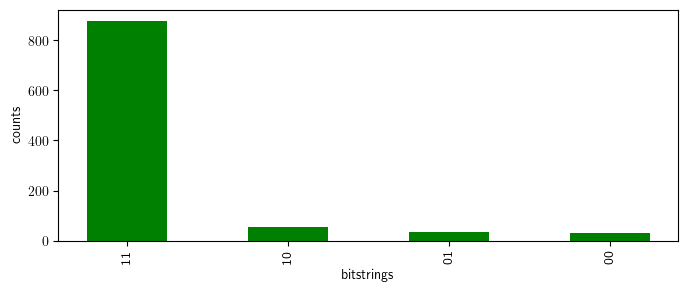

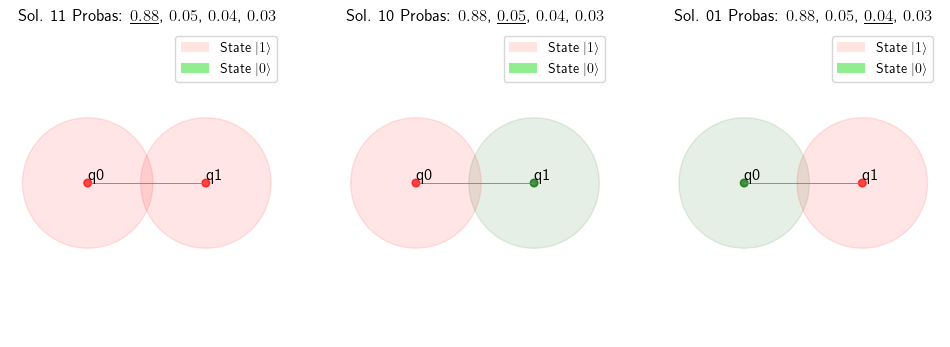

In [3]:
dx = 12
coords = [
    [-0, 0], 
    [dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -0
delta_f = 0
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


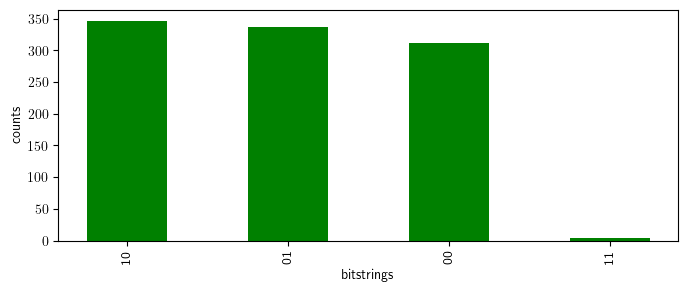

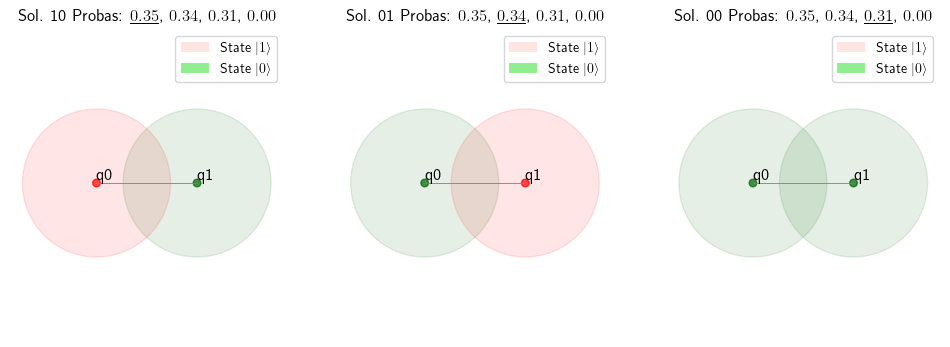

In [4]:
dx = 9
coords = [
    [-0, 0], 
    [dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -0
delta_f = 0
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

<>:37: SyntaxWarning: invalid escape sequence '\O'
<>:37: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_23987/4006260997.py:37: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


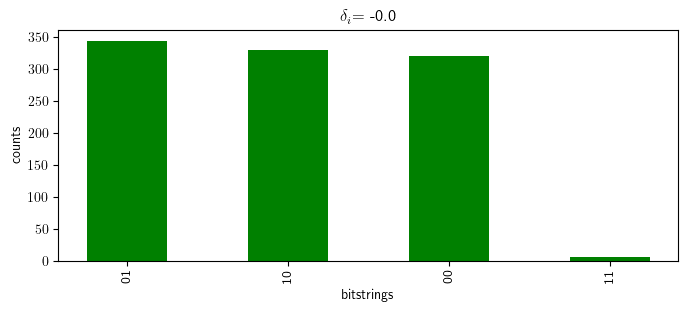

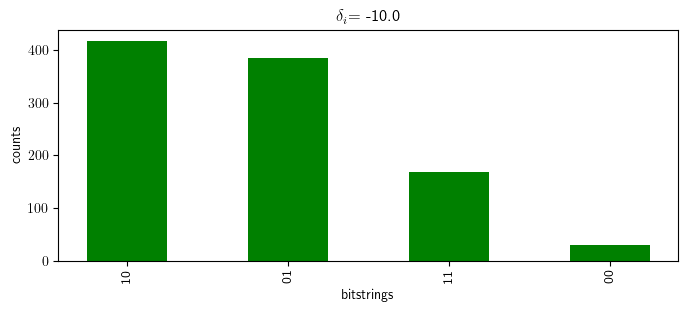

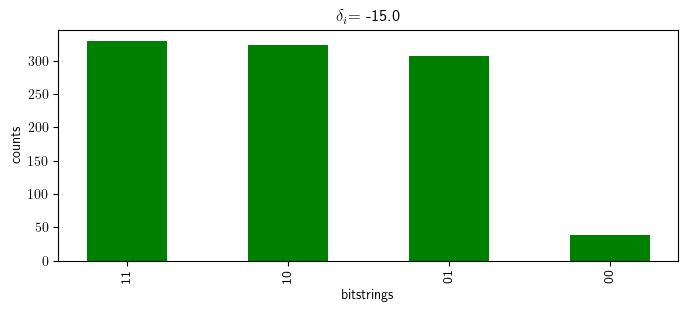

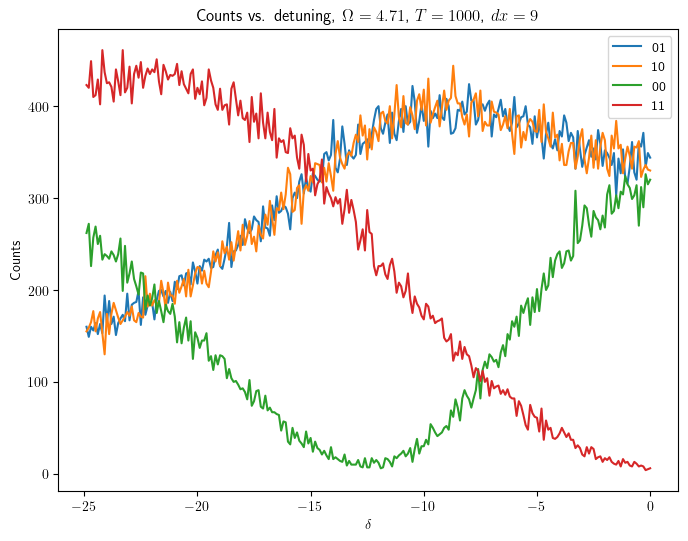

In [5]:
dx = 9
coords = [
    [-0, 0], 
    [dx, 0],
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

res = []
for d_i in np.arange(0, 25, 0.1):
    Omega = 1.5 * np.pi
    delta_i = - d_i
    delta_f = d_i
    T = 1000
    plot = True if d_i in [0, 10, 15] else False
    counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=plot, T=T, show=False) # dict of counts
    res.append([delta_i, counts])
    if plot:
        plt.title(r"$\delta_i$" + f"= {delta_i}")
        # draw_solutions(reg, counts, n=3, draw_graph=True)
        plt.show()

dis = [r[0] for r in res]
counts_01 = [r[1]["01"] for r in res]
counts_10 = [r[1]["10"] for r in res]
counts_00 = [r[1]["00"] for r in res]
counts_11 = [r[1]["11"] for r in res]

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(dis, counts_01, label="01")
plt.plot(dis, counts_10, label="10")
plt.plot(dis, counts_00, label="00")
plt.plot(dis, counts_11, label="11")
plt.legend()
plt.xlabel(r"$\delta$")
plt.ylabel("Counts")
plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\O'
<>:37: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_23987/4069568316.py:37: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")


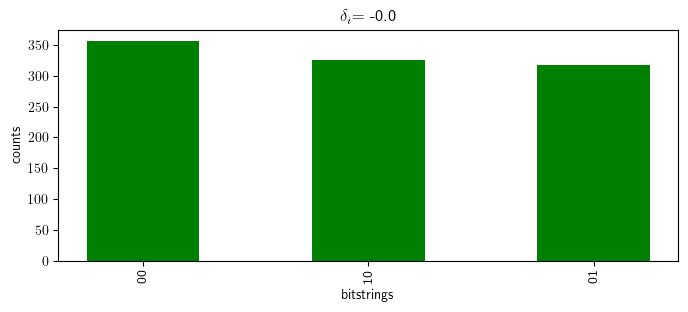

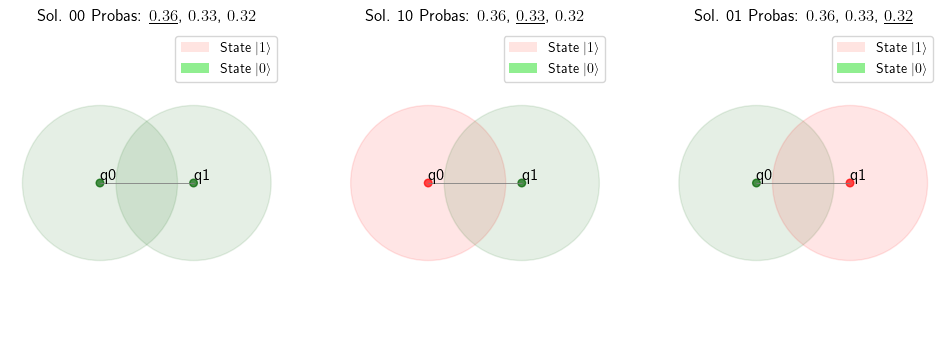

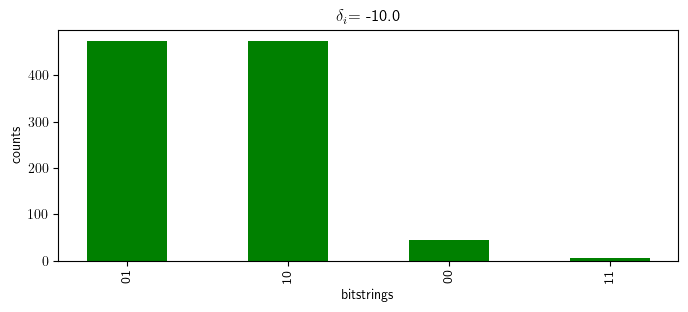

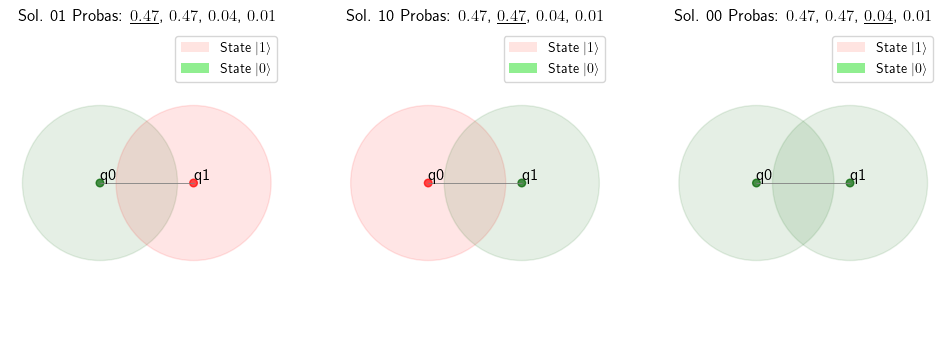

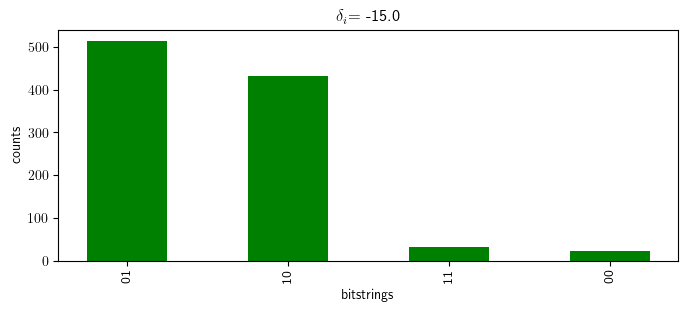

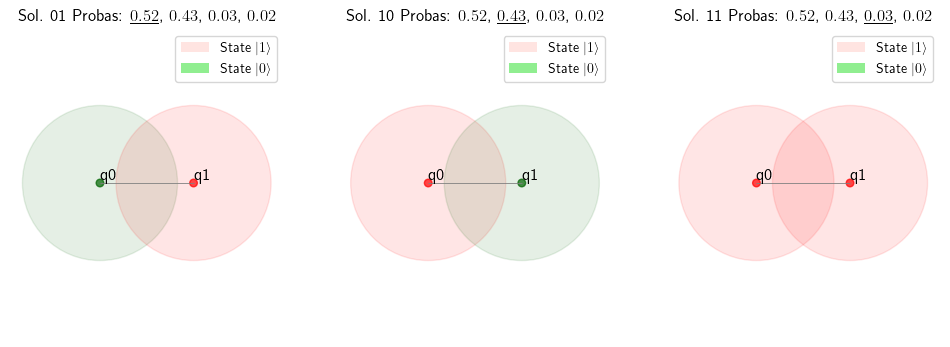

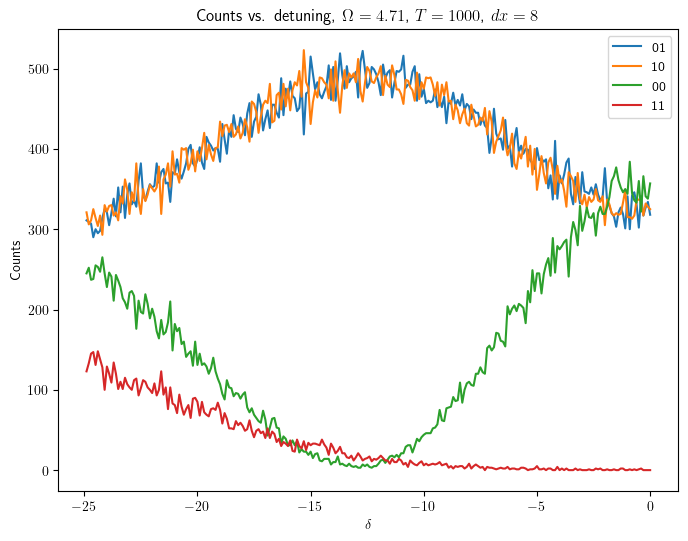

In [6]:
dx = 8
coords = [
    [-0, 0], 
    [dx, 0],
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

res = []
for d_i in np.arange(0, 25, 0.1):
    Omega = 1.5 * np.pi
    delta_i = - d_i
    delta_f = d_i
    T = 1000
    plot = True if d_i in [0, 10, 15] else False
    counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=plot, T=T, show=False) # dict of counts
    res.append([delta_i, counts])
    if plot:
        plt.title(r"$\delta_i$" + f"= {delta_i}")
        draw_solutions(reg, counts, n=3, draw_graph=True)
        plt.show()

dis = [r[0] for r in res]
counts_01 = [r[1]["01"] for r in res]
counts_10 = [r[1]["10"] for r in res]
counts_00 = [r[1]["00"] for r in res]
counts_11 = [r[1]["11"] for r in res]

fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(dis, counts_01, label="01")
plt.plot(dis, counts_10, label="10")
plt.plot(dis, counts_00, label="00")
plt.plot(dis, counts_11, label="11")
plt.legend()
plt.xlabel(r"$\delta$")
plt.ylabel("Counts")
plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
plt.show()

In [7]:
def counts_vs_detuning(dx, delta_start, delta_end, delta_step, Omega:float=1.5*np.pi, T:int=1000):
    coords = [
        [-0, 0], 
        [dx, 0],
        ]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)

    res = []
    for d_i in np.arange(delta_start, delta_end, delta_step):
        delta_i = - d_i
        delta_f = d_i
        T = 1000
        # plot = True if d_i in [0, 10, 15] else False
        plot = False
        counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=plot, T=T, show=False) # dict of counts
        res.append([delta_i, counts])
        if plot:
            plt.title(r"$\delta_i$" + f"= {delta_i}")
            # draw_solutions(reg, counts, n=3, draw_graph=True)
            plt.show()

    dis = [r[0] for r in res]
    counts_01 = [r[1]["01"] for r in res]
    counts_10 = [r[1]["10"] for r in res]
    counts_00 = [r[1]["00"] for r in res]
    counts_11 = [r[1]["11"] for r in res]

    fig, ax = plt.subplots(figsize=(8, 2.5))
    plt.plot(dis, counts_01, label="01")
    plt.plot(dis, counts_10, label="10")
    plt.plot(dis, counts_00, label="00")
    plt.plot(dis, counts_11, label="11")
    plt.legend()
    plt.xlabel(r"$\delta$")
    plt.ylabel("Counts")
    plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
    plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\O'
<>:37: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_23987/3572517836.py:37: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")


/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


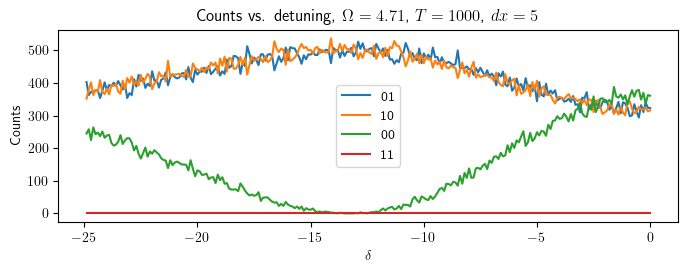

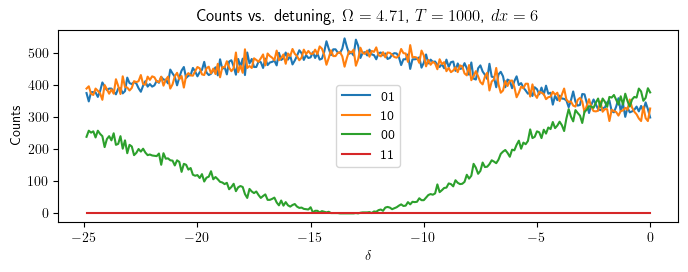

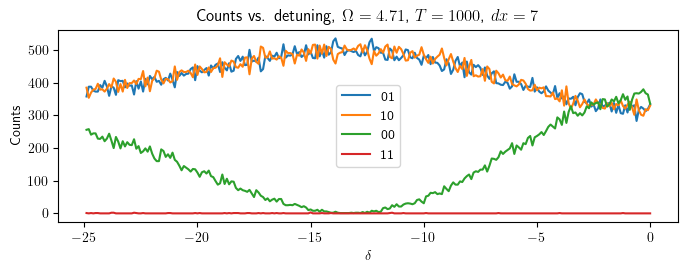

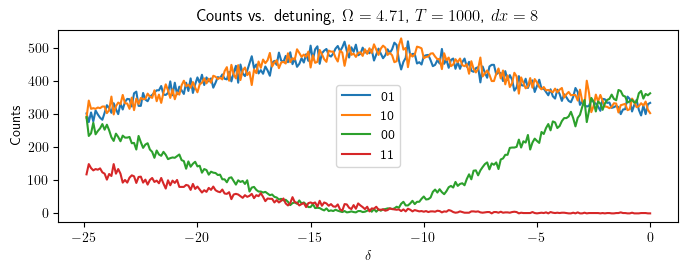

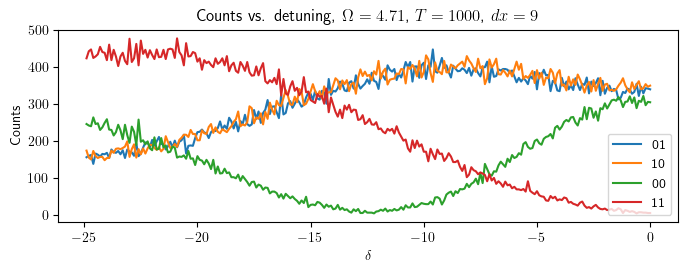

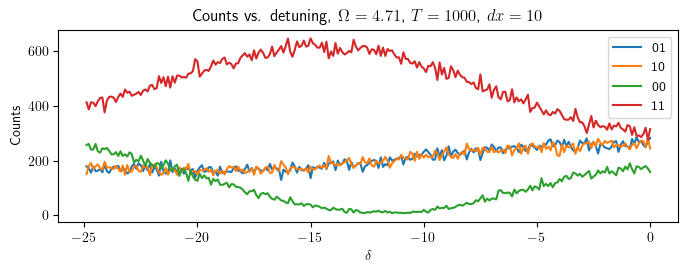

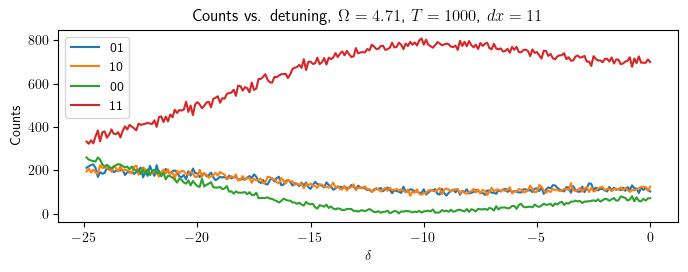

In [8]:
for dx in [5, 6, 7, 8, 9, 10, 11]:
    counts_vs_detuning(dx, 0, 25, 0.1, Omega = 1.5 * np.pi, T = 1000)

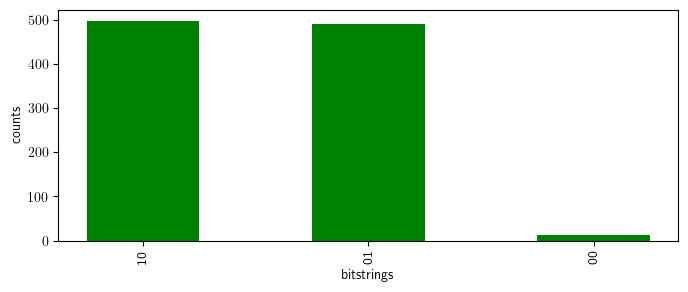

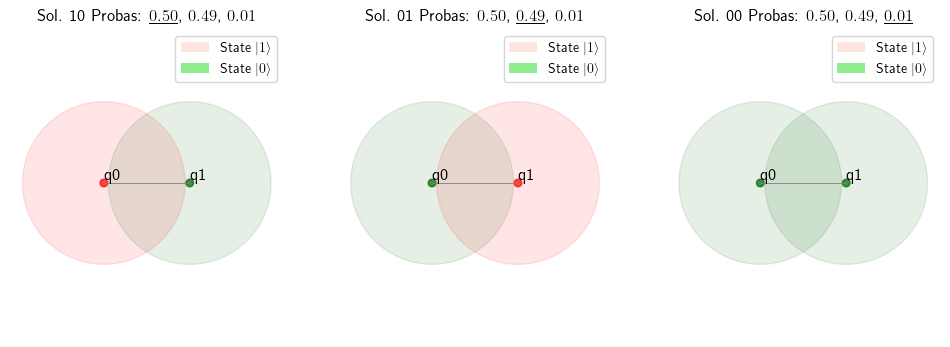

In [9]:
dx = 7
coords = [
    [-0, 0], 
    [dx, 0],
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -12
delta_f = 12
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

In [10]:
def counts_vs_separation(Omega, delta_i, delta_f, T, separations):
    results = {}
    for separation in separations:
        coords = [[-separation, 0], [separation, 0]]
        qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
        reg = Register(qubits)
        
        counts: dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T)  # dict of counts
        results[separation] = counts

    # plot
    fig, ax = plt.subplots(figsize=(5, 2.5))
    plt.plot(results.keys(), [c["01"] for c in [results[s] for s in results.keys()]], label="01")
    plt.plot(results.keys(), [c["10"] for c in [results[s] for s in results.keys()]], label="10")
    plt.plot(results.keys(), [c["00"] for c in [results[s] for s in results.keys()]], label="00")
    plt.plot(results.keys(), [c["11"] for c in [results[s] for s in results.keys()]], label="11")
    plt.legend()
    plt.xlabel("Separation")
    plt.ylabel("Counts")
    plt.title(r"Counts vs. Separation: $\Omega$ = " + f"{Omega:.2f}" + r", $\delta_i$ =" + f"{delta_i:.2f}" + r", $\delta_f$ = " + f"${delta_f:.2f}$, T$ = {T}$")
    plt.grid()
    plt.show()

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


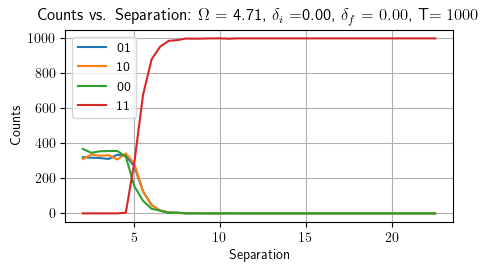

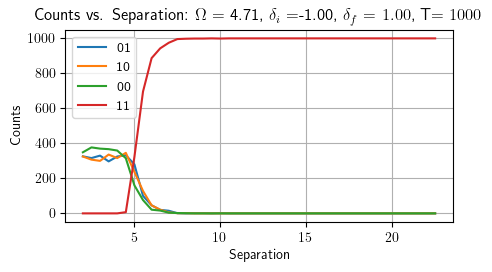

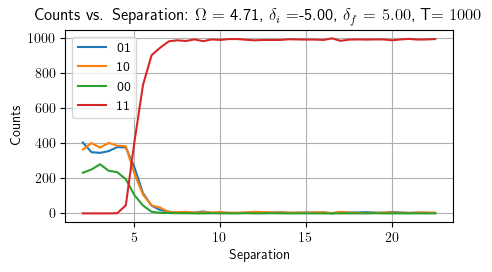

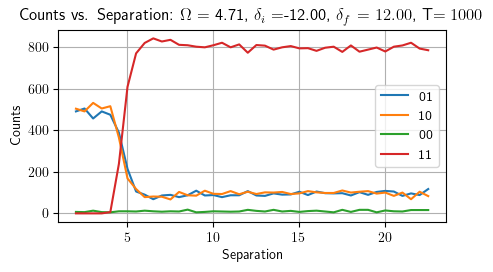

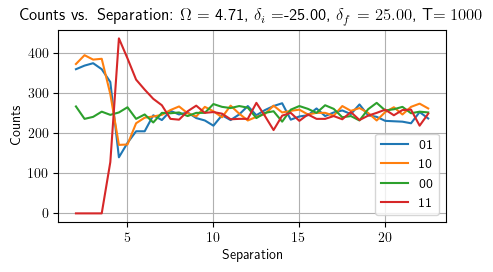

In [11]:
separations = np.arange(2, 23, 0.5)
results = {}

Omega = 1.5 * np.pi # gives approximately pi as area under the pulse
delta_i = -1
delta_f = 1
T = 1000

counts_vs_separation(Omega, 0, 0, T, separations)
counts_vs_separation(Omega, -1, 1, T, separations)
counts_vs_separation(Omega, -5, 5, T, separations)
counts_vs_separation(Omega, -12, 12, T, separations)
counts_vs_separation(Omega, -25, 25, T, separations)

We see that the probability of $|01\rangle$ and $|10\rangle$ increases if the atoms get closer.
So the whole thing is simply a Rydberg Blockade effect:

- if the atoms are far apart, they don't see each other. Each atom gets excited and we get $|11\rangle$ as intermediate state and then the atoms return to the ground state.
- if they are close, the state $|11\rangle$ is strongly suppressed and we don't get it. We get $(\alpha |10\rangle + \beta |01\rangle + \gamma |00\rangle)$ as intermediate state and when the laser is turned off, this state stays, because it has energy zero since $n_0 n_1 = 0$ for both of them.

# Link of 4

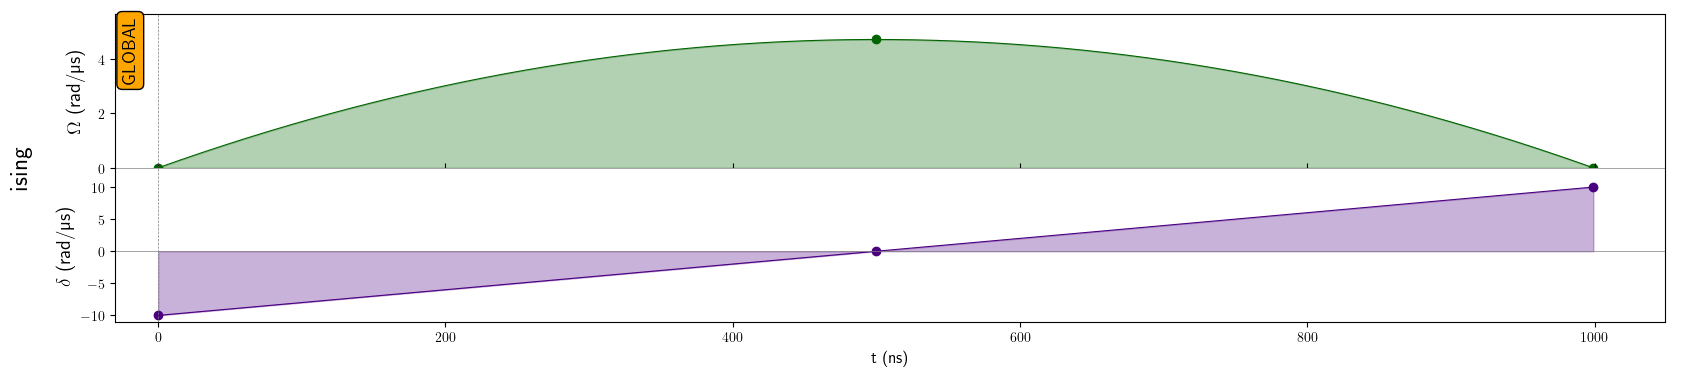

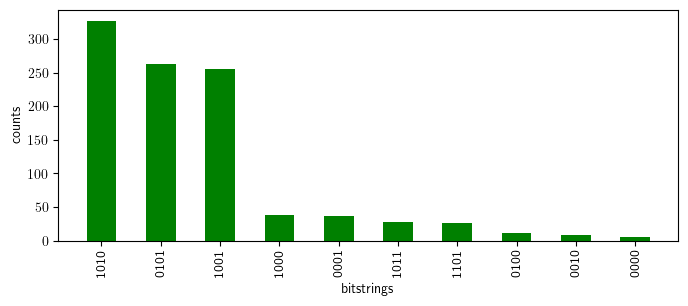

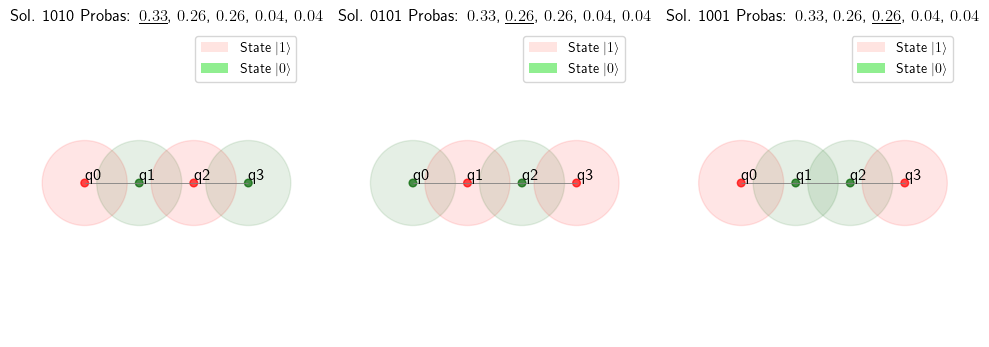

In [2]:
from matplotlib.patches import Patch
from matplotlib import rc

rc('text', usetex=True)

dx = 8.5
coords = [
    [-dx, 0], 
    [-0, 0], 
    [dx, 0],
    [2*dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -10
delta_f = -delta_i
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, draw_pulse=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

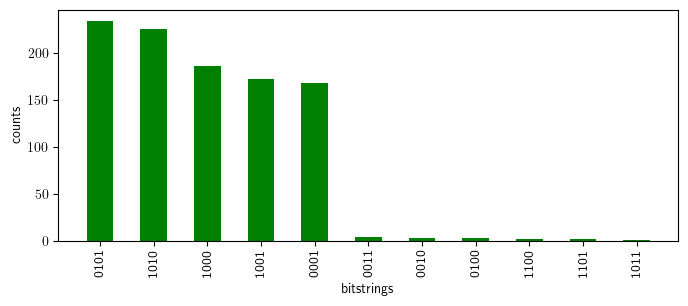

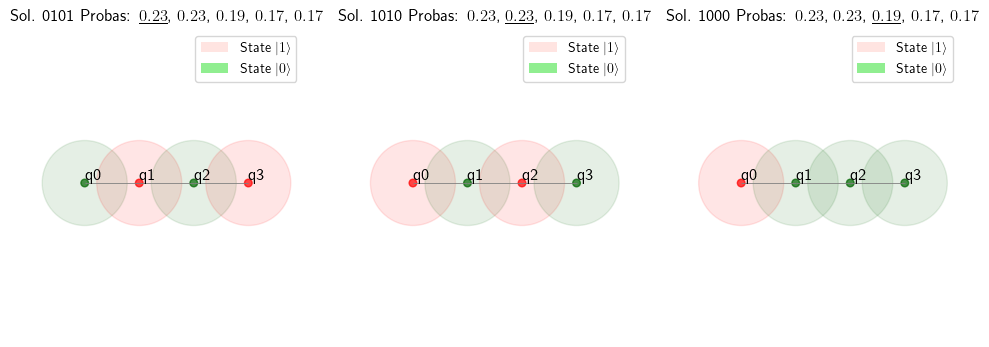

In [13]:
# smaller detuning (delta)

dx = 8.5
coords = [
    [-dx, 0], 
    [-0, 0], 
    [dx, 0],
    [2*dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

Omega = 1.5 * np.pi
delta_i = -5
delta_f = -delta_i
T = 1000
counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=True, T=T) # dict of counts
draw_solutions(reg, counts, n=3, draw_graph=True)

In [7]:
def counts_vs_detuning_4(dx, delta_start, delta_end, delta_step, Omega:float=1.5*np.pi, T:int=1000):
    delta_plot = 10.0 # plot at this detuning

    coords = [
        [-dx, 0], 
        [0, 0], 
        [dx, 0],
        [2*dx, 0], 
        ]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)

    res = []
    for d_i in np.arange(delta_start, delta_end, delta_step):
        delta_i = - d_i
        delta_f = d_i
        counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T, show=False) # dict of counts
        res.append([delta_i, counts])

    dis = [r[0] for r in res] # detuning
    # states = {s for s in res[0][1].keys()} # states
    fig, ax = plt.subplots(1, 3, figsize=(18, 4.5))
    states = ["0000", "0101", "1010", "1001", "1111", "1000", "0001"]
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "black", "yellow", "magenta", "teal", "lavender", "maroon", "navy", "aquamarine", "gold", "coral"]
    ls = ["-", "-", "-", "-", "-", "--", "--"]
    plt.sca(ax[0])
    for i, s in enumerate(states):
        counts = [r[1][s] for r in res]
        plt.plot(dis, counts, label=s, color=colors[i], ls=ls[i])
    plt.axvline(x=delta_plot, color='gray', ls='--', lw=2.5, alpha=0.8, label=r"$\delta_{\mathrm{plot}}$")
    plt.legend()
    plt.xlabel(r"$\delta$")
    plt.ylabel("Counts")
    plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
    plt.sca(ax[1])
    ii = [i for i, r in enumerate(res) if r[0] == delta_plot][0]
    draw_solutions(reg, res[ii][1], n=1, draw_graph=True, show=False, custom_ax=ax[1])
    # plt.tight_layout()

    plt.sca(ax[2])
    plot_distribution(res[ii][1], show=False, custom_ax=ax[2])
    ax[2].set_title(f"Distribution at $\delta={delta_plot}$")
    plt.show()

<>:34: SyntaxWarning: invalid escape sequence '\O'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:34: SyntaxWarning: invalid escape sequence '\O'
<>:42: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_24540/1517537536.py:34: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
/tmp/ipykernel_24540/1517537536.py:42: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_title(f"Distribution at $\delta={delta_plot}$")


/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


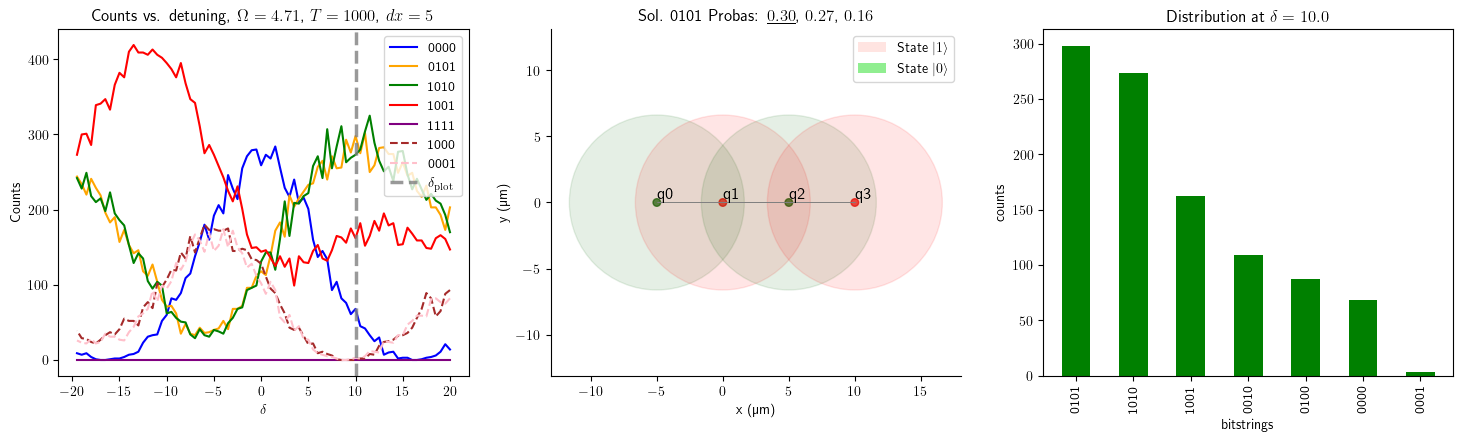

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


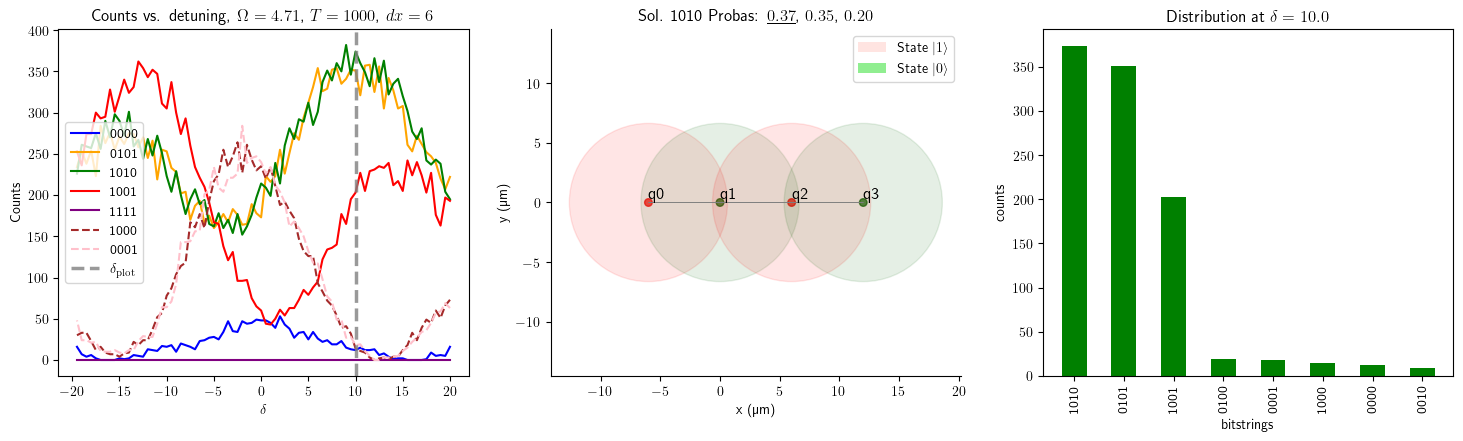

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


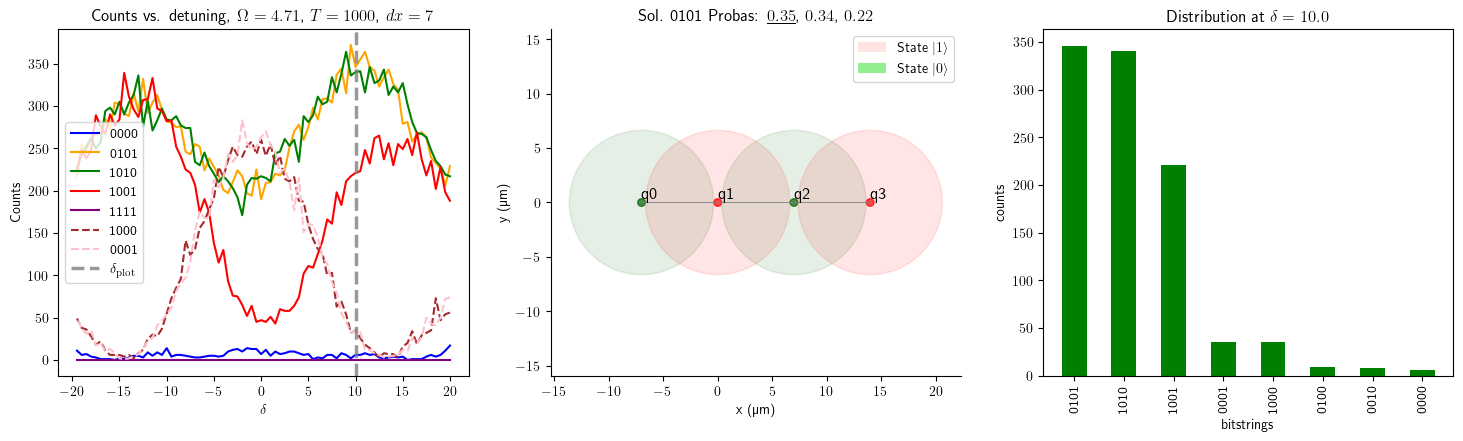

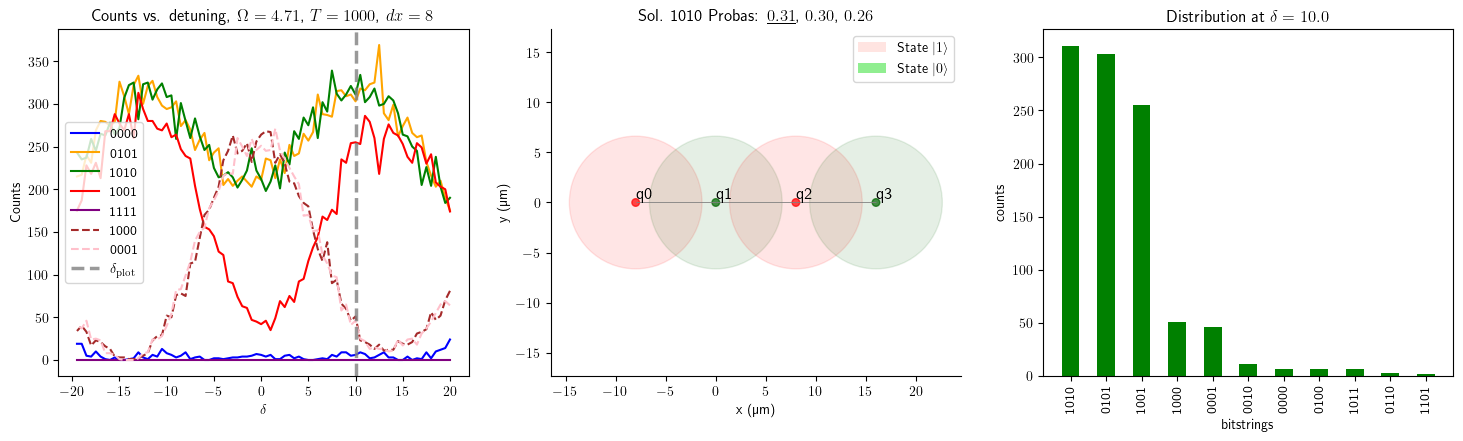

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


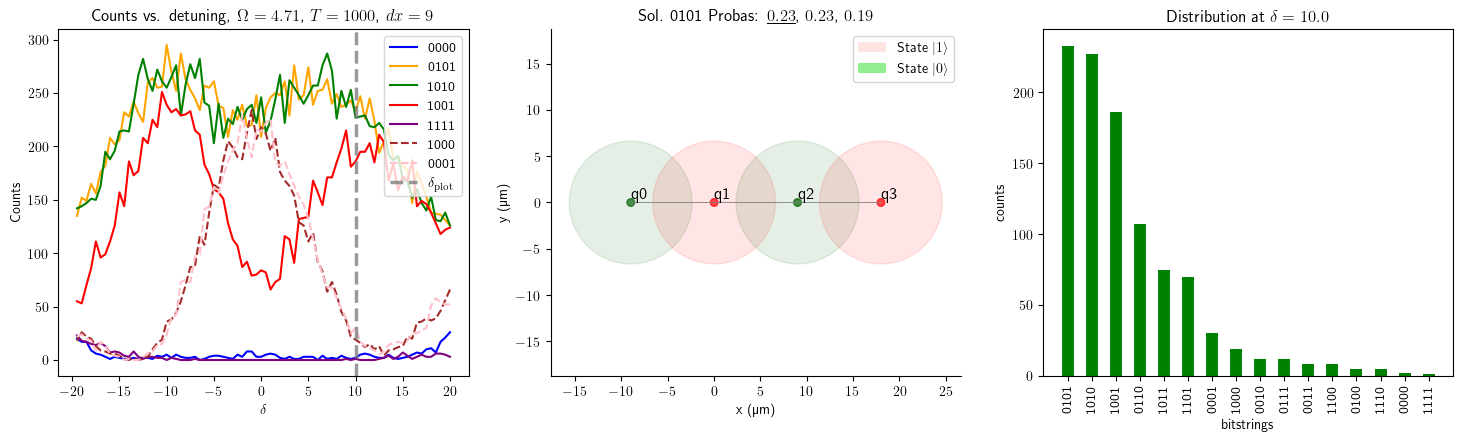

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


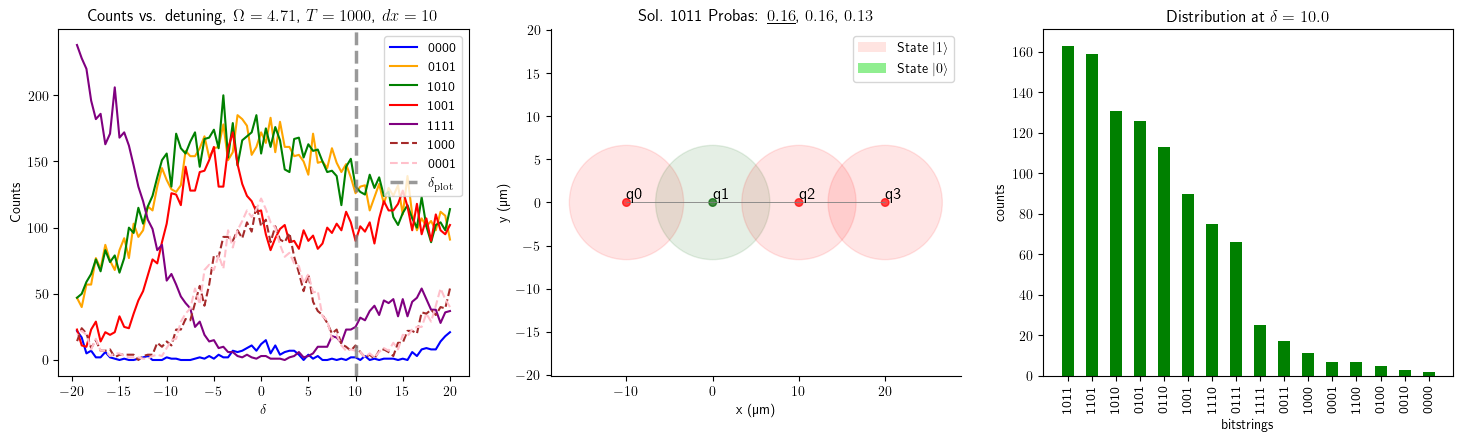

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


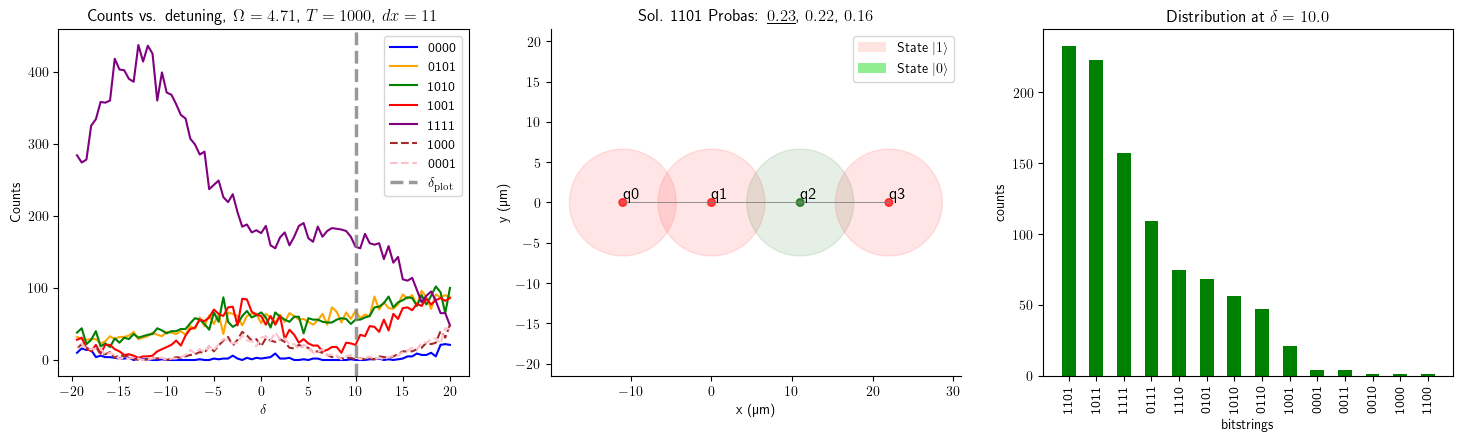

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


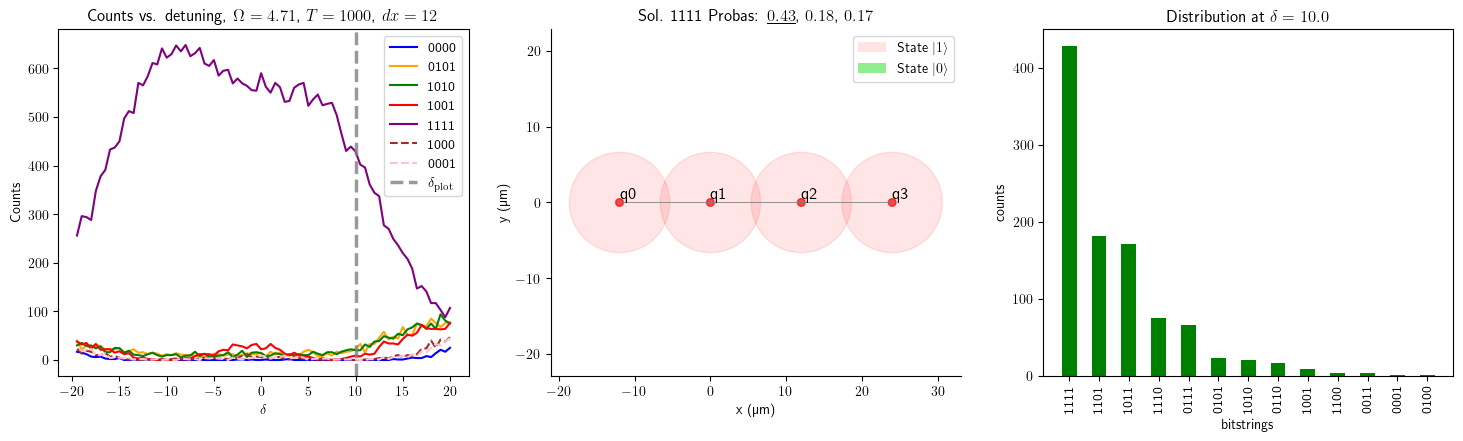

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


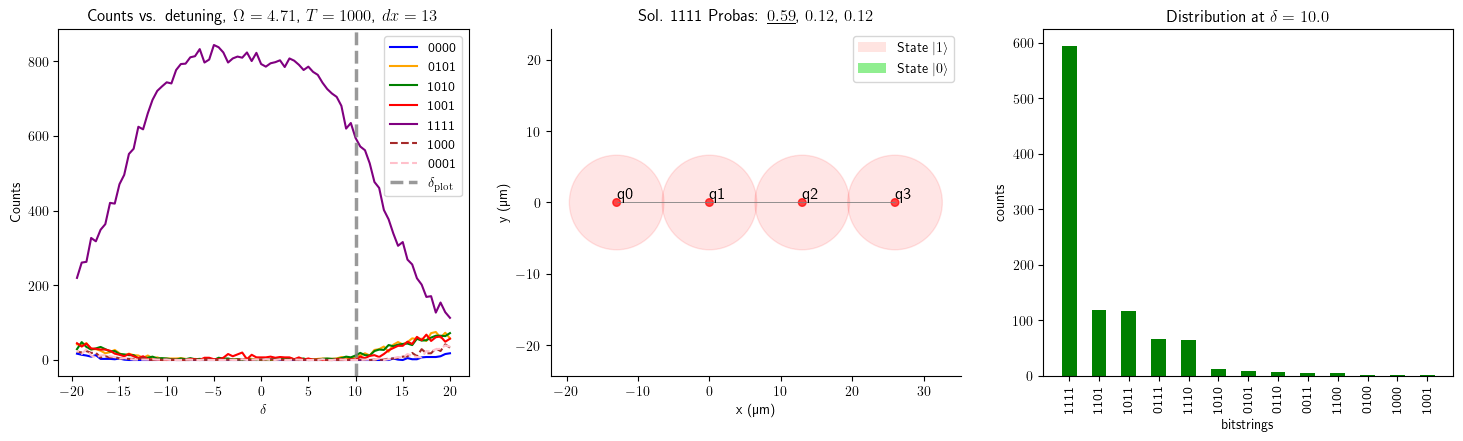

In [8]:
for dx in [5, 6, 7, 8, 9, 10, 11, 12, 13]:
    counts_vs_detuning_4(dx, -20, 20, 0.5, Omega = 1.5 * np.pi, T = 1000)

## Chain of 5

<>:35: SyntaxWarning: invalid escape sequence '\O'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\O'
<>:42: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_30364/981802667.py:35: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
/tmp/ipykernel_30364/981802667.py:42: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_title(f"Distribution at $\delta={delta_plot}$")
/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


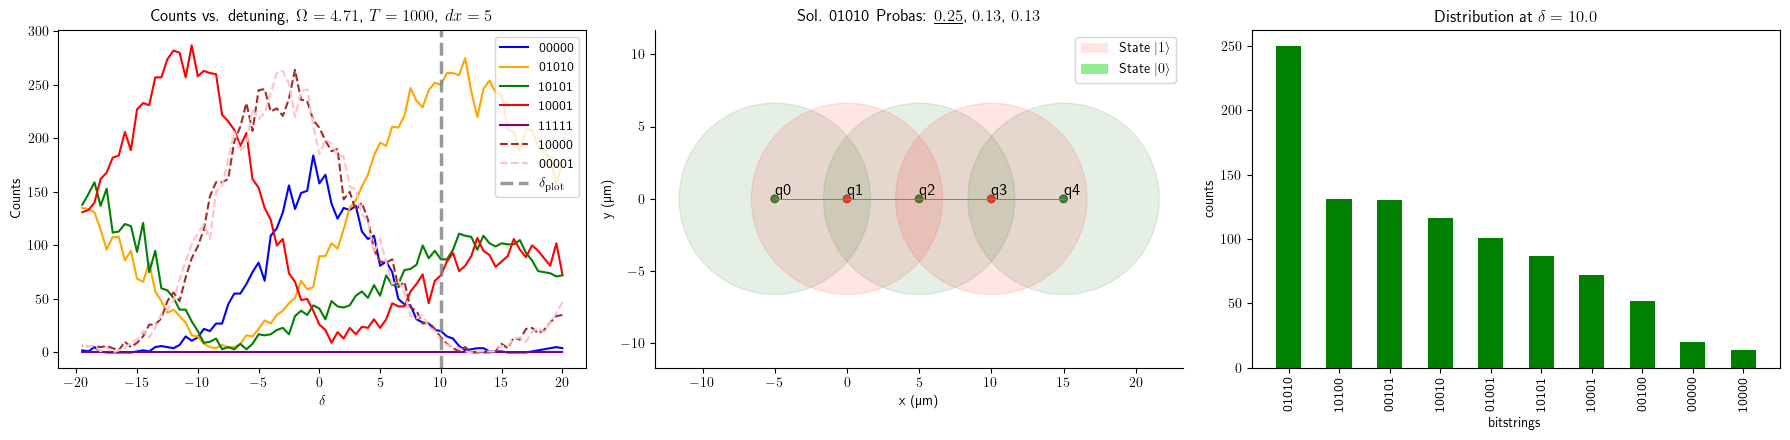

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


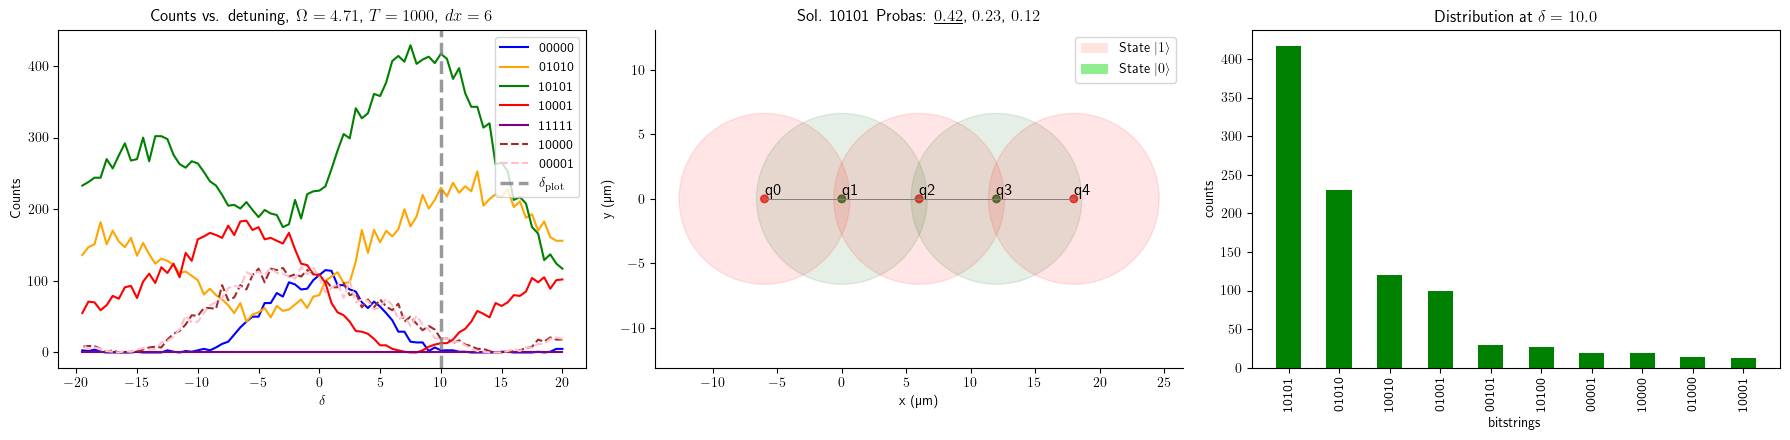

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


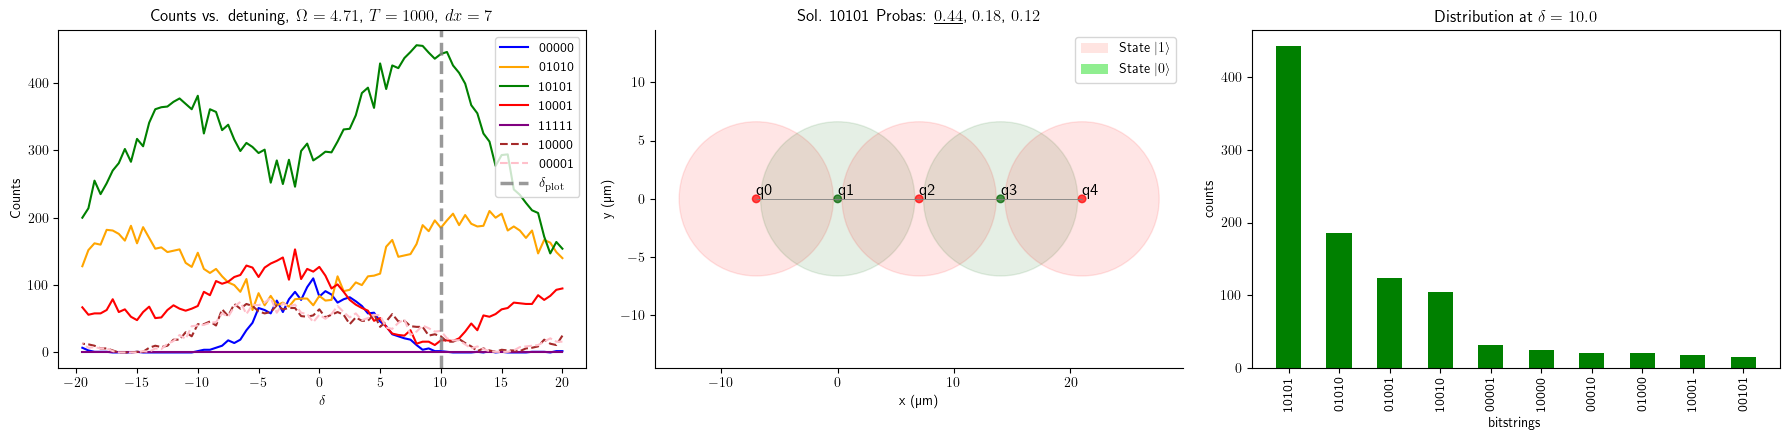

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


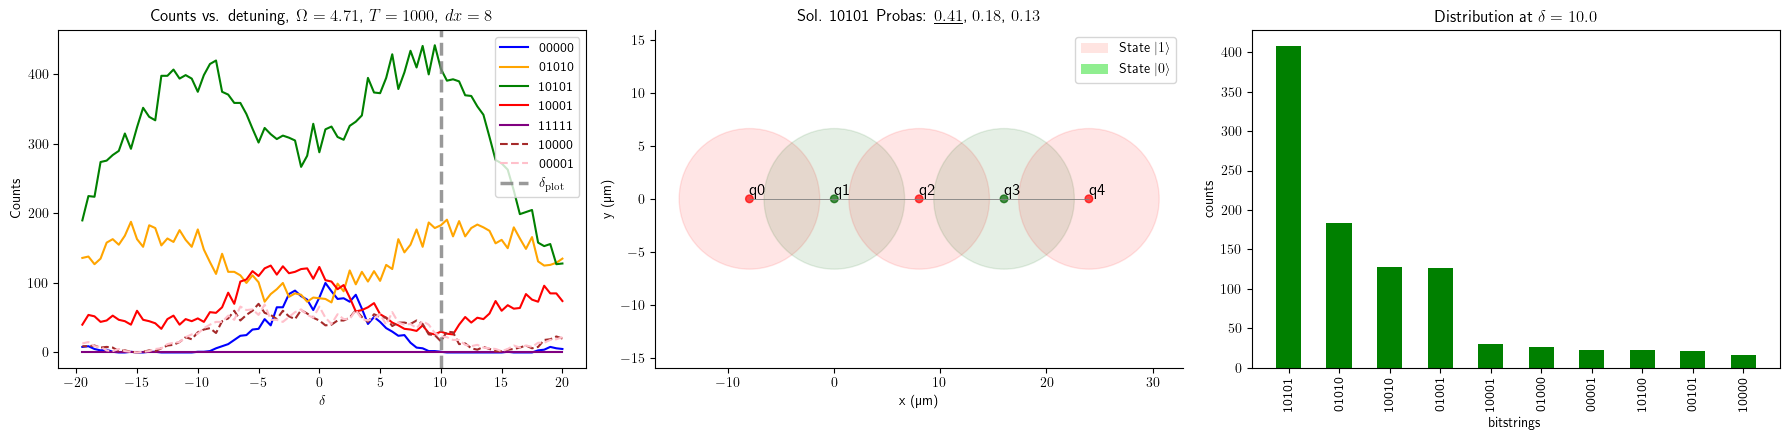

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


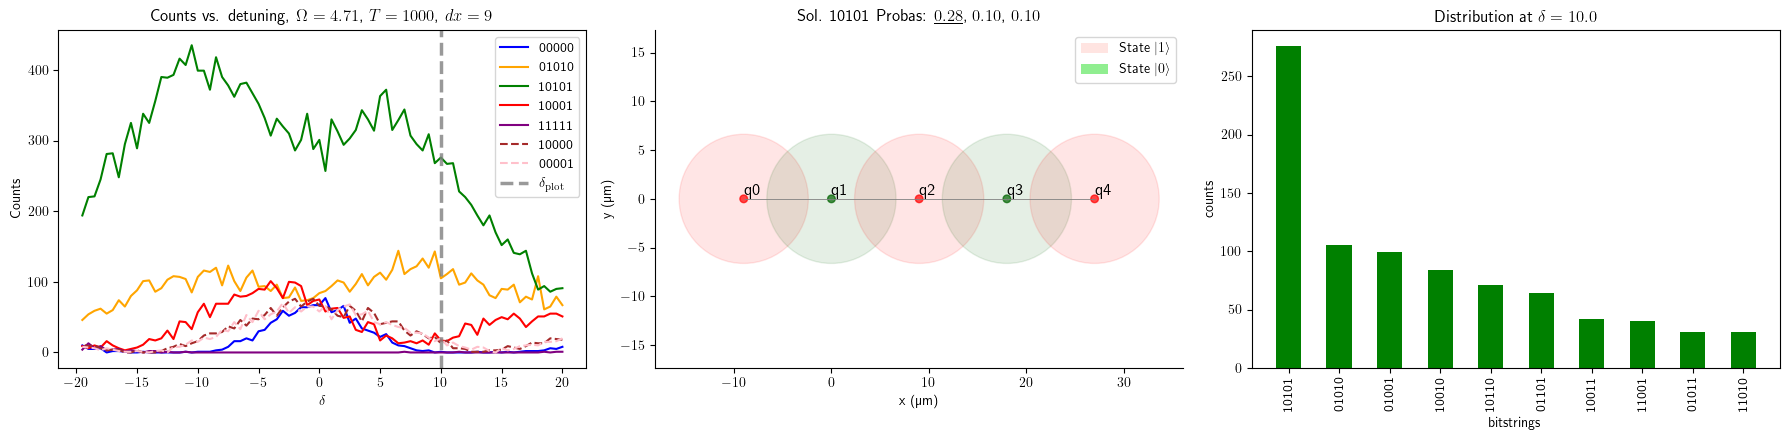

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


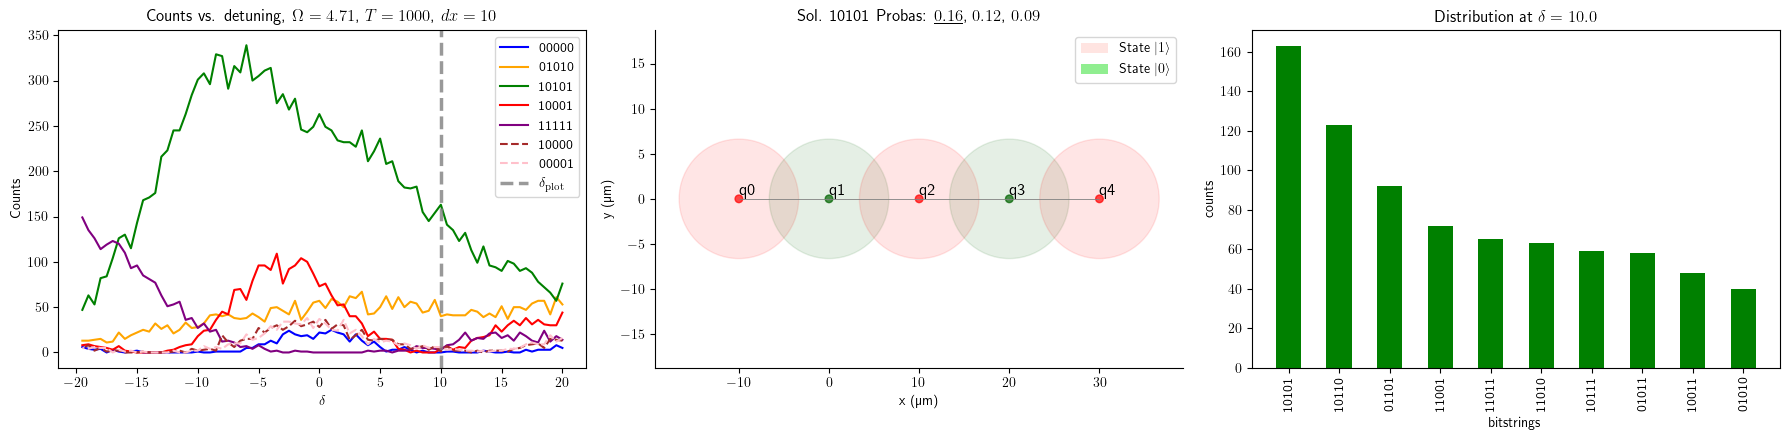

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


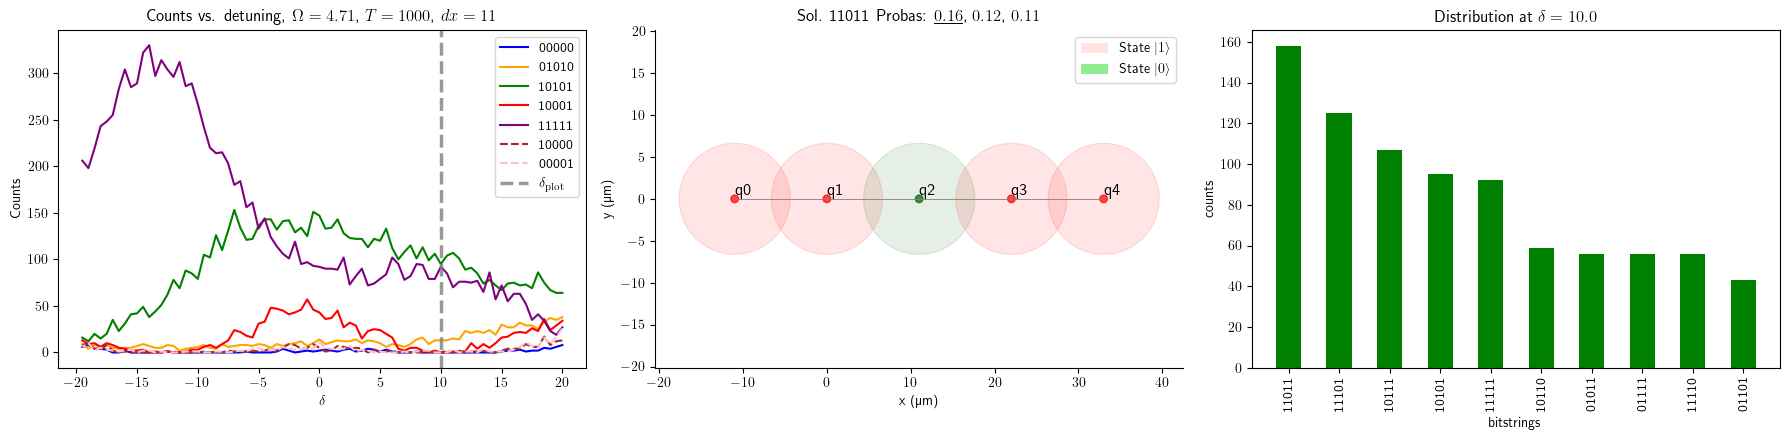

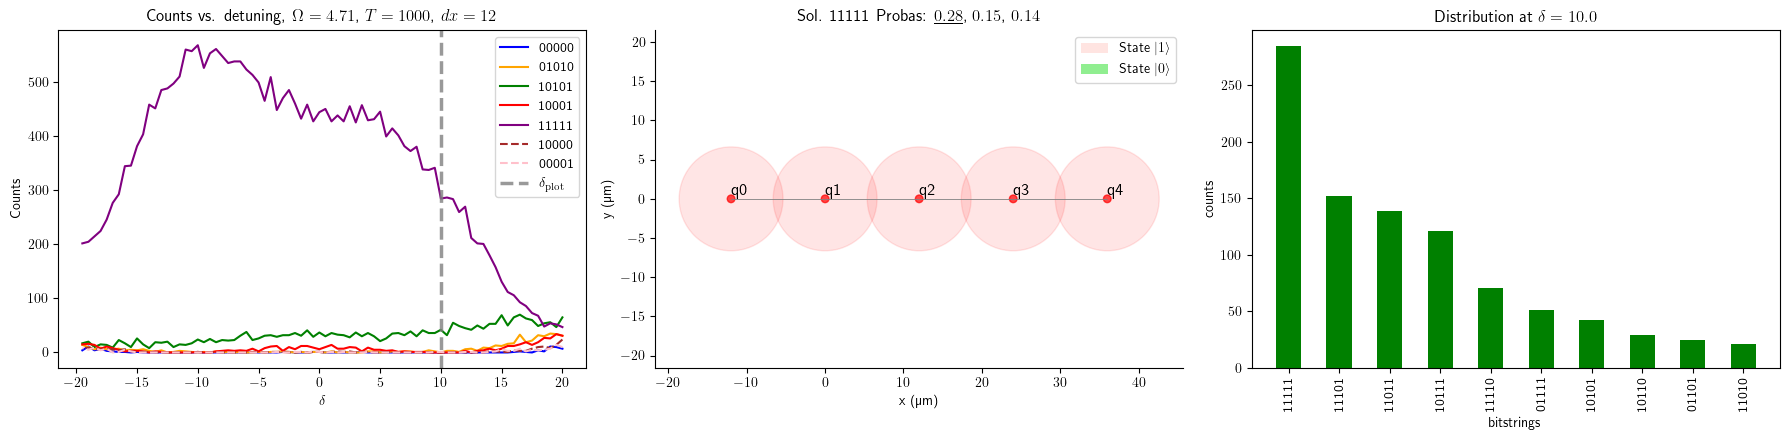

/home/bigbogo/miniconda3/envs/pulser/lib/python3.12/site-packages/pulser/waveforms.py:920: RuntimeWarning: divide by zero encountered in log10
  min(np.finfo(samples.dtype).precision - np.log10(value_range), 9)


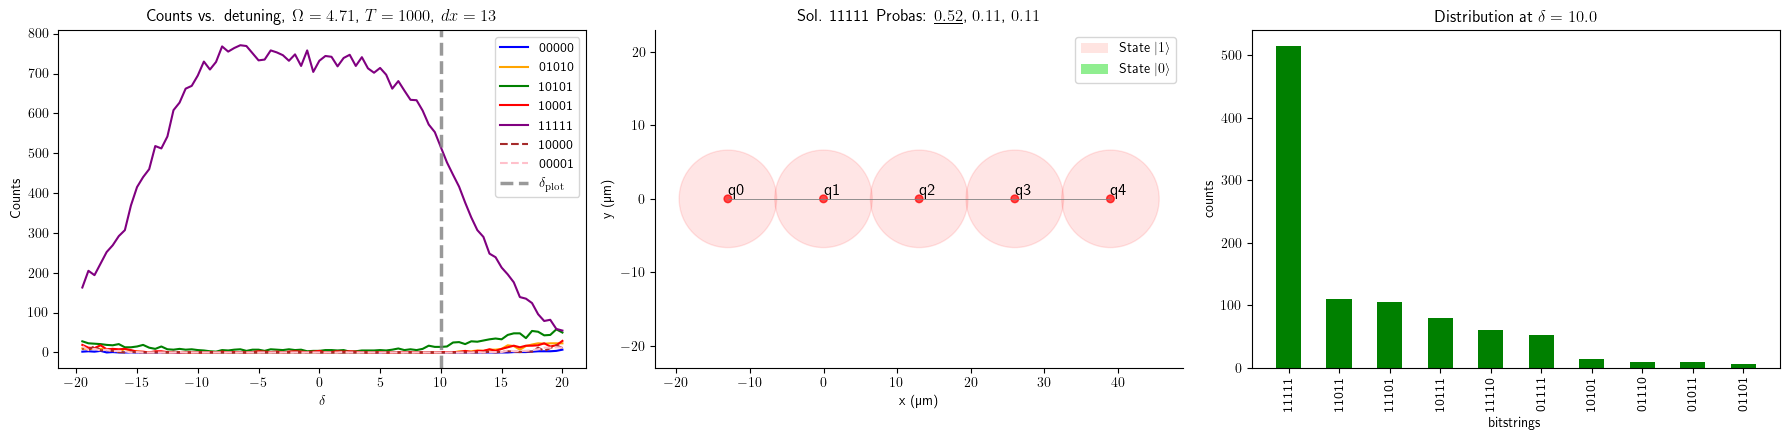

In [2]:
def counts_vs_detuning_5(dx, delta_start, delta_end, delta_step, Omega:float=1.5*np.pi, T:int=1000):
    delta_plot = 10.0 # plot at this detuning

    coords = [
        [-dx, 0], 
        [0, 0], 
        [dx, 0],
        [2*dx, 0], 
        [3*dx, 0], 
        ]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)

    res = []
    for d_i in np.arange(delta_start, delta_end, delta_step):
        delta_i = - d_i
        delta_f = d_i
        counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T, show=False) # dict of counts
        res.append([delta_i, counts])

    dis = [r[0] for r in res] # detuning
    # states = {s for s in res[0][1].keys()} # states
    fig, ax = plt.subplots(1, 3, figsize=(18, 4.5))
    states = ["00000", "01010", "10101", "10001", "11111", "10000", "00001"]
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "black", "yellow", "magenta", "teal", "lavender", "maroon", "navy", "aquamarine", "gold", "coral"]
    ls = ["-", "-", "-", "-", "-", "--", "--"]
    plt.sca(ax[0])
    for i, s in enumerate(states):
        counts = [r[1][s] for r in res]
        plt.plot(dis, counts, label=s, color=colors[i], ls=ls[i])
    plt.axvline(x=delta_plot, color='gray', ls='--', lw=2.5, alpha=0.8, label=r"$\delta_{\mathrm{plot}}$")
    plt.legend()
    plt.xlabel(r"$\delta$")
    plt.ylabel("Counts")
    plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
    plt.sca(ax[1])
    ii = [i for i, r in enumerate(res) if r[0] == delta_plot][0]
    draw_solutions(reg, res[ii][1], n=1, draw_graph=True, show=False, custom_ax=ax[1])

    plt.sca(ax[2])
    plot_distribution(res[ii][1], show=False, custom_ax=ax[2])
    ax[2].set_title(f"Distribution at $\delta={delta_plot}$")
    plt.tight_layout()
    plt.show()

for dx in [5, 6, 7, 8, 9, 10, 11, 12, 13]:
    counts_vs_detuning_5(dx, -20, 20, 0.5, Omega = 1.5 * np.pi, T = 1000)

We see that the states $|10101\rangle$ and $|01010\rangle$ don't have the same probability. This can be fixed with local detuning or with anchors.

## Anchors
Let's add two atoms right and left to make the two states $|10101\rangle$ and $|01010\rangle$ have the same probability:

In [22]:
import warnings
# ignore RuntimeWarning: divide by zero encountered in log10
warnings.filterwarnings("ignore", category=RuntimeWarning)

def counts_vs_detuning_5_with_anchors(dx, delta_start, delta_end, delta_step, Omega:float=1.5*np.pi, T:int=1000, adx=0.5):
    delta_plot = -12.5 # plot at this detuning

    coords = [
        [-2*dx, 0], 
        [-dx, 0], 
        [0, 0], 
        [dx, 0],
        [2*dx, 0], 
        [-3*dx - adx, 0],
        [3*dx + adx, 0],
        ]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)

    res = []
    for d_i in np.arange(delta_start, delta_end, delta_step):
        delta_i = - d_i
        delta_f = d_i
        counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T, show=False, 
                             draw_pulse = True if d_i == delta_plot else False
                             ) # dict of counts
        res.append([delta_i, counts])

    dis = [r[0] for r in res] # detuning
    # states = {s for s in res[0][1].keys()} # states
    fig, ax = plt.subplots(1, 3, figsize=(18, 4.5))
    states = ["0000011", "0101011", "1010111", "1000111", "1111111", "1000011", "0000111"]
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "black", "yellow", "magenta", "teal", "lavender", "maroon", "navy", "aquamarine", "gold", "coral"]
    ls = ["-", "-", "-", "-", "-", "--", "--"]
    plt.sca(ax[0])
    for i, s in enumerate(states):
        counts = [r[1][s] for r in res]
        plt.plot(dis, counts, label=s, color=colors[i], ls=ls[i])
    plt.axvline(x=delta_plot, color='gray', ls='--', lw=2.5, alpha=0.8, label=r"$\delta_{\mathrm{plot}}$")
    plt.legend()
    plt.xlabel(r"$\delta$")
    plt.ylabel("Counts")
    plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
    plt.sca(ax[1])
    ii = [i for i, r in enumerate(res) if r[0] == delta_plot][0]
    draw_solutions(reg, res[ii][1], n=1, draw_graph=True, show=False, custom_ax=ax[1])

    plt.sca(ax[2])
    plot_distribution(res[ii][1], show=False, custom_ax=ax[2])
    ax[2].set_title(f"Distribution at $\delta={delta_plot}$")
    plt.tight_layout()
    plt.show()

<>:43: SyntaxWarning: invalid escape sequence '\O'
<>:50: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\O'
<>:50: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_30364/3129041864.py:43: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
/tmp/ipykernel_30364/3129041864.py:50: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_title(f"Distribution at $\delta={delta_plot}$")


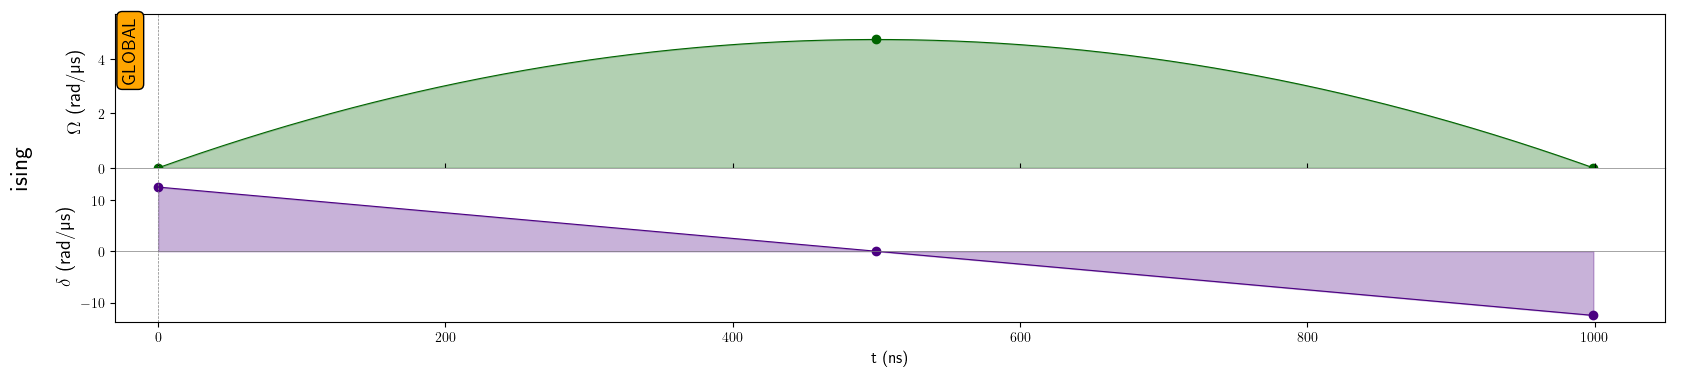

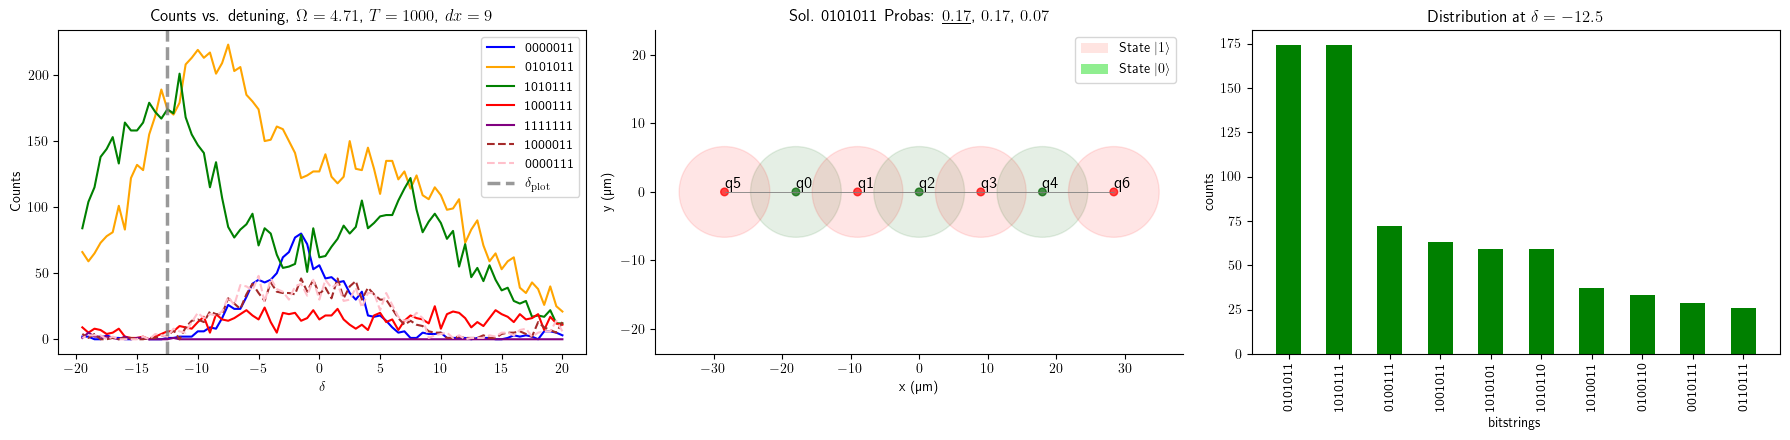

In [37]:
# dx = 7 --> ads = 3.5
# dx = 8 --> ads = 2.8
# dx = 9 --> ads = 1.43
# for dx in [5, 6, 7, 8, 9, 10, 11, 12, 13]:
for dx in [9]:
    counts_vs_detuning_5_with_anchors(dx, -20, 20, 0.5, Omega = 1.5 * np.pi, T = 1000, adx=1.43)

# With Local Detuning
https://pulser.readthedocs.io/en/stable/tutorials/dmm.html

(work in progress)

In [17]:
import numpy as np

from dataclasses import replace

from matplotlib import pyplot as plt

from pulser.channels.dmm import DMM
from pulser.devices import AnalogDevice
from pulser.register import Register
from pulser.register.register_layout import RegisterLayout
from pulser.register.mappable_reg import MappableRegister
from pulser.register.weight_maps import DetuningMap
from pulser.sampler import sampler
from pulser.sequence import Sequence
from pulser.pulse import Pulse
from pulser.waveforms import ConstantWaveform, RampWaveform
from pulser.waveforms import InterpolatedWaveform
from pulser_simulation import QutipEmulator

It is not so easy to find good detuning parameters.
For some reason it works better for me to have the global $\delta$ go from 12.5 to -12.5.    
Then, the local detunings are only applied on the inner atoms and the value is np.pi/20.0 * 20.0. No idea why this one works best.


{'dmm_0': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=None, propagation_dir=None, bottom_detuning=-125.66370614359172, total_bottom_detuning=-6283.185307179586), 'dmm_1': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=1, min_duration=1, max_duration=100000000, min_avg_amp=0, mod_bandwidth=None, custom_phase_jump_time=None, eom_config=None, propagation_dir=None, bottom_detuning=None, total_bottom_detuning=None)}
{'dmm_0': DMM(addressing='Global', max_abs_detuning=None, max_amp=0, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=67108864, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=None, propaga

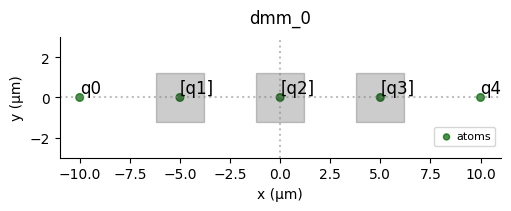

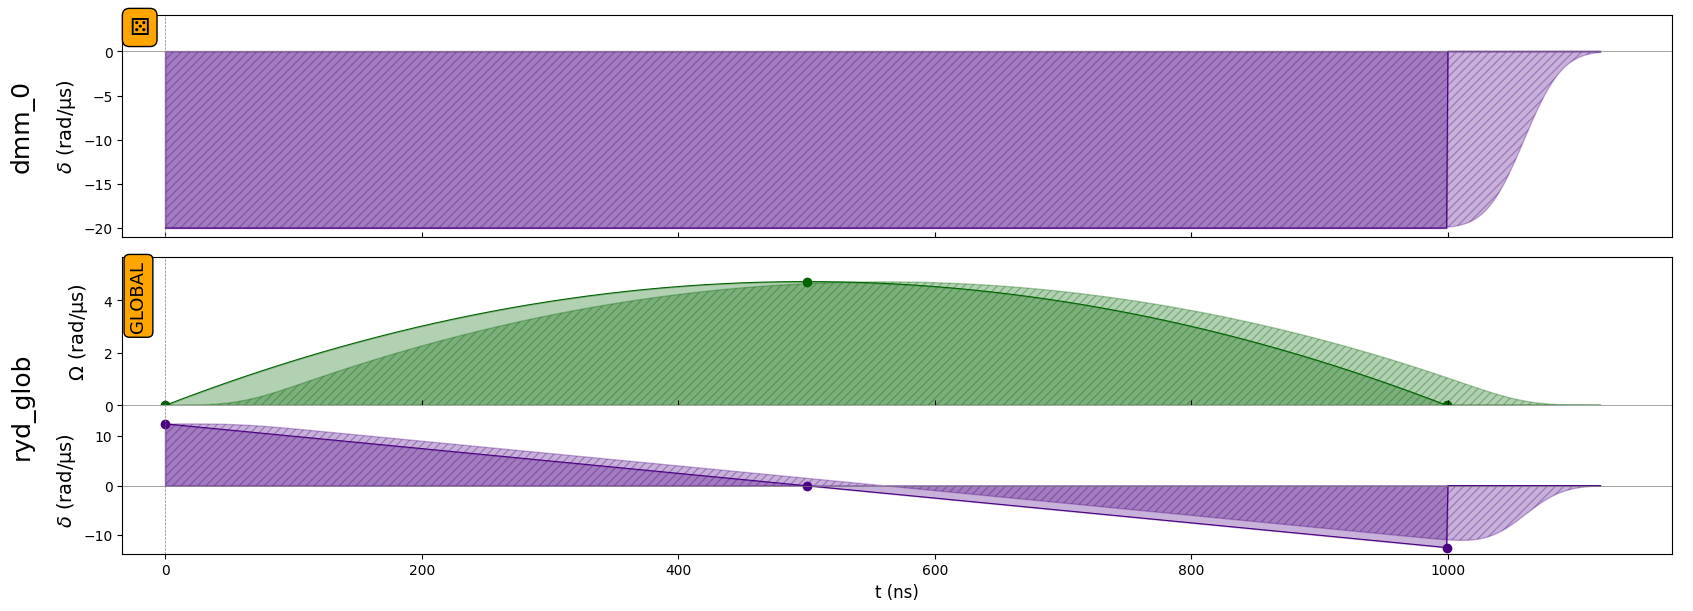

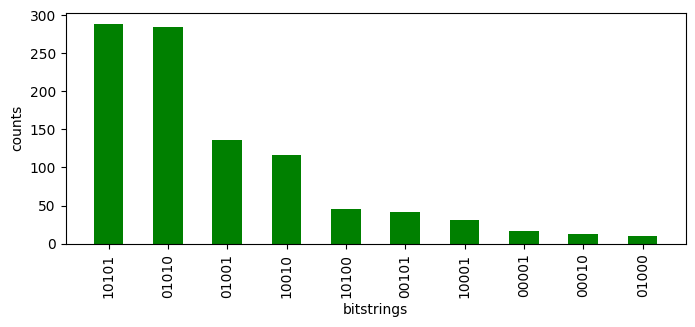

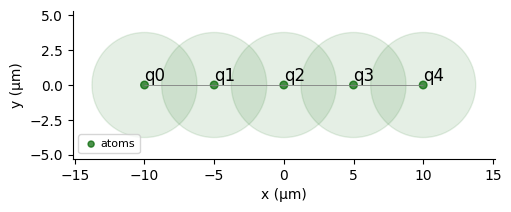

Counter({'10101': 289, '01010': 285, '01001': 136, '10010': 116, '10100': 45, '00101': 42, '10001': 31, '00001': 16, '00010': 13, '01000': 10, '10000': 10, '00100': 6, '00000': 1})


In [170]:
plt.rc("text", usetex=False)  # latex error in register.draw else

dx = 5
coords = [
    [-2*dx, 0], 
    [-dx, 0], 
    [0, 0], 
    [dx, 0],
    [2*dx, 0], 
    ]
qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}

detuning_val = -20 # detuning between 0 and -20 MHz
dd = np.pi/20.0 # how much detuning to apply to each trap
trap_coordinates = coords
weights_1 = [0.0, dd, dd, dd, dd, 0.0]  # between 0 and 1

register_layout = RegisterLayout(trap_coordinates)
detuning_map = register_layout.define_detuning_map(
    {i: weights_1[i] for i in range(4)}  # mapping between trap ids and weights
)

register = Register.from_coordinates(
    trap_coordinates, center=False, prefix="q"
)

dmm = DMM(
    clock_period=4,
    min_duration=16,
    max_duration=2**26,
    mod_bandwidth=8,
    bottom_detuning=-2 * np.pi * 20,  # detuning between 0 and -20 MHz
    total_bottom_detuning=-2 * np.pi * 1000,  # total detuning
)
mock_device = replace(
    AnalogDevice.to_virtual(),
    dmm_objects=(dmm, DMM()),
    reusable_channels=True,
)

seq = Sequence(register, mock_device)
seq.config_detuning_map(detuning_map, "dmm_0")
print(mock_device.dmm_channels)
print(seq.declared_channels)

seq.add_dmm_detuning(ConstantWaveform(1000, detuning_val), "dmm_0") # detuning between 0 and -20 MHz. Multiply by above weights

T = 1000
Omega = 1.5 * np.pi
delta_i = 12.5
delta_f = -delta_i
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]),
    InterpolatedWaveform(T, [delta_i, 0, delta_f]),
    0,
)

seq.declare_channel("ryd_glob", "rydberg_global")
seq.add(adiabatic_pulse, "ryd_glob", protocol="no-delay")
seq.draw(draw_detuning_maps=True)

simul = QutipEmulator.from_sequence(seq)
results = simul.run()
final = results.get_final_state()
count_dict = results.sample_final_state()
plot_distribution(count_dict, show=True)
register.draw(draw_graph=True, draw_half_radius=True, blockade_radius=mock_device.rydberg_blockade_radius(Omega))

print(count_dict)

<>:35: SyntaxWarning: invalid escape sequence '\O'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\O'
<>:42: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_30364/3418887963.py:35: SyntaxWarning: invalid escape sequence '\O'
  plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
/tmp/ipykernel_30364/3418887963.py:42: SyntaxWarning: invalid escape sequence '\d'
  ax[2].set_title(f"Distribution at $\delta={delta_plot}$")


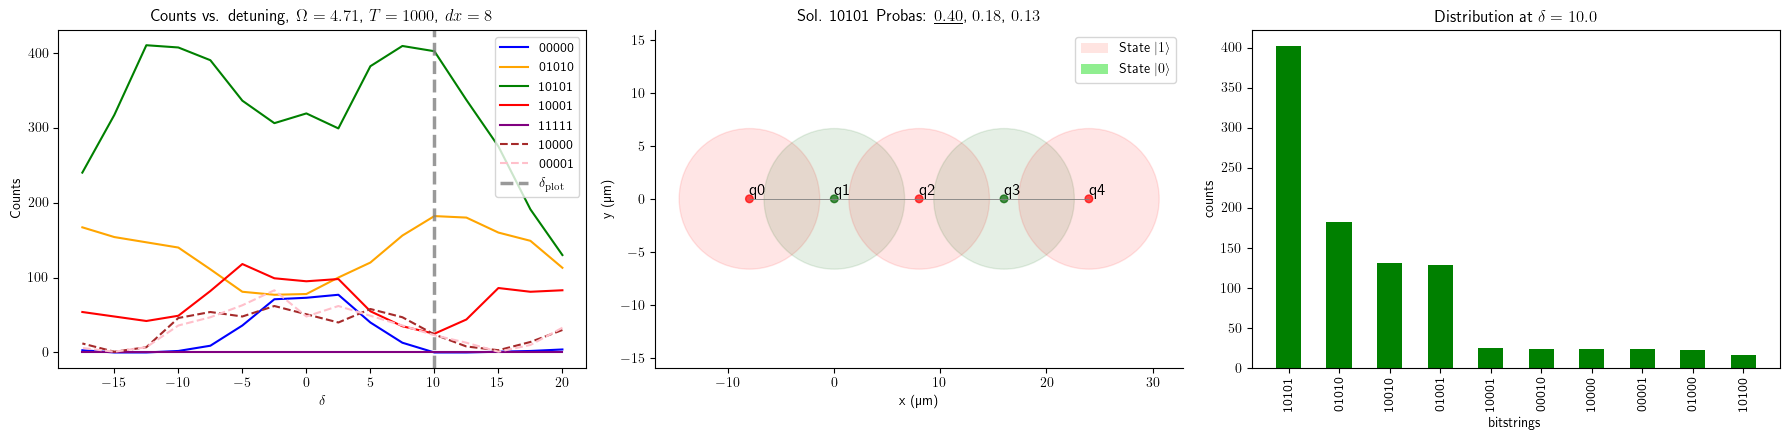

In [ ]:
def counts_vs_detuning_5_with_local_detuning(dx, delta_start, delta_end, delta_step, Omega:float=1.5*np.pi, T:int=1000):
    """ not implemented """
    delta_plot = 10.0 # plot at this detuning

    coords = [
        [-dx, 0], 
        [0, 0], 
        [dx, 0],
        [2*dx, 0], 
        [3*dx, 0], 
        ]
    qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
    reg = Register(qubits)

    res = []
    for d_i in np.arange(delta_start, delta_end, delta_step):
        delta_i = - d_i
        delta_f = d_i
        counts:dict = anneal(reg, Omega, delta_i, delta_f, draw_distribution=False, T=T, show=False) # dict of counts
        res.append([delta_i, counts])

    dis = [r[0] for r in res] # detuning
    # states = {s for s in res[0][1].keys()} # states
    fig, ax = plt.subplots(1, 3, figsize=(18, 4.5))
    states = ["00000", "01010", "10101", "10001", "11111", "10000", "00001"]
    colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "black", "yellow", "magenta", "teal", "lavender", "maroon", "navy", "aquamarine", "gold", "coral"]
    ls = ["-", "-", "-", "-", "-", "--", "--"]
    plt.sca(ax[0])
    for i, s in enumerate(states):
        counts = [r[1][s] for r in res]
        plt.plot(dis, counts, label=s, color=colors[i], ls=ls[i])
    plt.axvline(x=delta_plot, color='gray', ls='--', lw=2.5, alpha=0.8, label=r"$\delta_{\mathrm{plot}}$")
    plt.legend()
    plt.xlabel(r"$\delta$")
    plt.ylabel("Counts")
    plt.title(f"Counts vs. detuning, $\Omega = {Omega:.2f}$, $T = {T}$, $dx = {dx}$")
    plt.sca(ax[1])
    ii = [i for i, r in enumerate(res) if r[0] == delta_plot][0]
    draw_solutions(reg, res[ii][1], n=1, draw_graph=True, show=False, custom_ax=ax[1])

    plt.sca(ax[2])
    plot_distribution(res[ii][1], show=False, custom_ax=ax[2])
    ax[2].set_title(f"Distribution at $\delta={delta_plot}$")
    plt.tight_layout()
    plt.show()

for dx in [8]:
    counts_vs_detuning_5_with_local_detuning(dx, -20, 20, 2.5, Omega = 1.5 * np.pi, T = 1000)